In [2]:
from karateclub import Graph2Vec, NetLSD, FeatherGraph, WaveletCharacteristic
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import os

/home/mahf/Desktop/thesis/karateclub/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path = "../data/hashtags/vertices"
hashtag_args = [f[:-5] for f in os.listdir(path) if f.endswith('.json')]

graphs = []
names = []

for hashtag in hashtag_args:
    names.append(hashtag)
    with open(f'../data/hashtags/edges/{hashtag}_edges.txt', 'r') as f:
        edges = f.readlines()
        
    users = []
    for edge in edges:
        u, v = edge.strip().split(',')
        if 'None' in v:
            continue
        u_user = u.split('/')[-3]
        v_user = v.split('/')[-3]
        users.append((u_user, v_user))
        # if (v_user, u_user) not in users:
        #     users.append((v_user, u_user))

    all_users = set([user for edge in users for user in edge])
    user_to_id = {user: i for i, user in enumerate(all_users)}

    users = [(user_to_id[src], user_to_id[dst]) for src, dst in users]

    G = nx.Graph()
    G.add_edges_from(users)
    G = nx.DiGraph(G)

    graphs.append(G)


In [4]:
#model = Graph2Vec()
model = FeatherGraph()

In [5]:
#graphs = [nx.erdos_renyi_graph(100, i/10) for i in range(11) for _ in range(10)] + [nx.watts_strogatz_graph(100, 6, i/10) for i in range(11) for _ in range(10)]
model.fit(graphs)
#params = [i for i in range(11) for _ in range(10)] + [i for i in range(11) for _ in range(10)]
# graph_types = ['Erdos-Renyi' for _ in range(110)] + ['Watts-Strogatz' for _ in range(110)]

In [6]:
x = model.get_embedding()

In [7]:
tsne = TSNE(n_components=2, perplexity=15)
x2d = tsne.fit_transform(x)

#pca = PCA(n_components=2)
#x2d = pca.fit_transform(x)

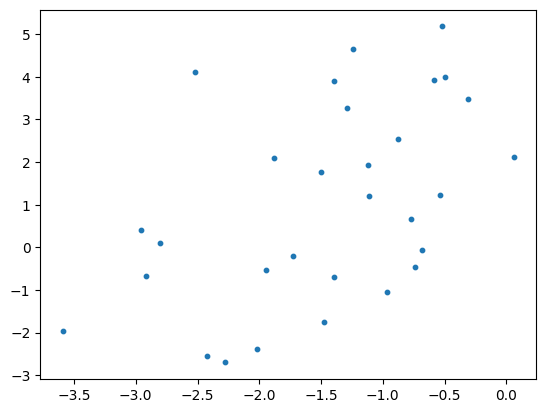

In [8]:
fig, ax = plt.subplots()
ax.scatter(x2d[:, 0], x2d[:, 1], s=10)